In [ ]:
#install requests
!pip install requests

## Request module
Making HTTP "requests" in python

- The web is really just computers talking to each other, one common standard protocol is HTTP. This allows for a predefined language for sending and receiving data.
- GET, POST, PUT, DELETE, (some others too)

In [3]:
import requests

In [6]:
url = "https://www.google.com"
requests.get(url)
# 200 means success, 400 means failur

<Response [200]>

Example of getting the text from a web page. Web Scraping

In [10]:
url = "https://www.york.ac.uk/teaching/cws/wws/webpage1.html"
text = requests.get(url).text
text

'<HMTL>\n<HEAD>\n<TITLE>webpage1</TITLE>\n</HEAD>\n<BODY BGCOLOR="FFFFFf" LINK="006666" ALINK="8B4513" VLINK="006666">\n<TABLE WIDTH="75%" ALIGN="center">\n<TR>\n<TD>\n<DIV ALIGN="center"><H1>STARTING . . . </H1></DIV>\n\n\n<DIV ALIGN="justify"><P>There are lots of ways to create web pages using already coded programmes. These lessons will teach you how to use the underlying HyperText Markup Language -  HTML. \n<BR>\n<P>HTML isn\'t computer code, but is a language that uses US English to enable texts (words, images, sounds) to be inserted and formatting such as colo(u)r and centre/ering to be written in. The process is fairly simple; the main difficulties often lie in small mistakes - if you slip up while word processing your reader may pick up your typos, but the page will still be legible. However, if your HTML is inaccurate the page may not appear - writing web pages is, at the least, very good practice for proof reading!</P>\n\n<P>Learning HTML will enable you to:\n<UL>\n<LI>create

Can make it more understandable with beautiful soup module


In [12]:
!pip install beautifulsoup4

  Using cached beautifulsoup4-4.12.3-py3-none-any.whl (147 kB)
  Using cached soupsieve-2.5-py3-none-any.whl (36 kB)
You should consider upgrading via the '/Users/awshift/Documents/PythonLearning2024/lectures/session-6/.venv/bin/python -m pip install --upgrade pip' command.


In [15]:
from bs4 import BeautifulSoup
url = "https://www.york.ac.uk/teaching/cws/wws/webpage1.html"
text = requests.get(url)
soup = BeautifulSoup(text.content, "html.parser")
soup

<hmtl>
<head>
<title>webpage1</title>
</head>
<body alink="8B4513" bgcolor="FFFFFf" link="006666" vlink="006666">
<table align="center" width="75%">
<tr>
<td>
<div align="center"><h1>STARTING . . . </h1></div>
<div align="justify"><p>There are lots of ways to create web pages using already coded programmes. These lessons will teach you how to use the underlying HyperText Markup Language -  HTML. 
<br/>
<p>HTML isn't computer code, but is a language that uses US English to enable texts (words, images, sounds) to be inserted and formatting such as colo(u)r and centre/ering to be written in. The process is fairly simple; the main difficulties often lie in small mistakes - if you slip up while word processing your reader may pick up your typos, but the page will still be legible. However, if your HTML is inaccurate the page may not appear - writing web pages is, at the least, very good practice for proof reading!</p>
<p>Learning HTML will enable you to:
<ul>
<li>create your own simple page

In [22]:
# can find by attributes
results = soup.find_all("div")
results[0]

<div align="center"><h1>STARTING . . . </h1></div>

Also API that exist that you can query

API = Application Programming Interface

APIs are a structured way for one program to offer services to other programs

An awesome like of free available APIs [https://github.com/public-apis/public-apis] 

- Some require Authentication - and can limit use of resources - APIKey

In [26]:
url = "http://dog-api.kinduff.com/api/facts"

fact = requests.get(url)

print(fact.text)

{"facts":["The French Bulldog is incapable of reproducing naturally."],"success":true}


response is a JSON object (Javascript Object Notation)
- A common way for structuring HTTP responses or data in databases
- { Key : Value} structure

In [29]:
import json

# some JSON:
x =  '{ "name":"John", "age":30, "city":"New York"}'

# parse x:
y = json.loads(x)

# the result is a Python dictionary:
print(y["age"])

30


In [32]:
url = "http://dog-api.kinduff.com/api/facts"

fact = requests.get(url)
json_data = json.loads(fact.text)
print(json_data['facts'])

['Pugs and other dogs with short muzzles have a peculiar head-type known as "Brachycephalic."']


More complex example to get weather in different locations

In [33]:
places = {
    "Minneapolis": [44.986656, -93.258133],
    "Tokyo": [35.652832, 139.839478],
    "Chicago": [41.881832, -87.623177]
}

In [39]:
import pprint

for name, location in places.items():
    lat = location[0]
    lon = location[1]
    url = f'https://api.weather.gov/points/{lat},{lon}'

    try:
        print(f"Getting Weather for {name}\n")
        response = requests.get(url)
        if response.status_code == 200:
            json_data = json.loads(response.text)
            pprint.pprint(json_data)
        else:
            print(f"No weather data for {name}")
    except requests.exceptions.RequestException as e:
        # catastrophic error. bail.
        raise SystemExit(e)

    print()


Getting Weather for Minneapolis

{'@context': ['https://geojson.org/geojson-ld/geojson-context.jsonld',
              {'@version': '1.1',
               '@vocab': 'https://api.weather.gov/ontology#',
               'bearing': {'@type': 's:QuantitativeValue'},
               'city': 's:addressLocality',
               'county': {'@type': '@id'},
               'distance': {'@id': 's:Distance',
                            '@type': 's:QuantitativeValue'},
               'forecastGridData': {'@type': '@id'},
               'forecastOffice': {'@type': '@id'},
               'geo': 'http://www.opengis.net/ont/geosparql#',
               'geometry': {'@id': 's:GeoCoordinates',
                            '@type': 'geo:wktLiteral'},
               'publicZone': {'@type': '@id'},
               's': 'https://schema.org/',
               'state': 's:addressRegion',
               'unit': 'http://codes.wmo.int/common/unit/',
               'unitCode': {'@id': 's:unitCode', '@type': '@id'},
      

This gives us many more apis to call, lets look at todays forecast

In [43]:
import pprint

for name, location in places.items():
    lat = location[0]
    lon = location[1]
    url = f'https://api.weather.gov/points/{lat},{lon}'

    try:
        print(f"Getting Weather for {name}\n")
        response = requests.get(url)
        if response.status_code == 200:
            json_data = json.loads(response.text)
            hourly = json_data["properties"]["forecastHourly"] # make sure nested keys properly
            hours_response = requests.get(hourly)
            pprint.pprint(hours_response.text)
        else:
            print(f"No weather data for {name}")
    except requests.exceptions.RequestException as e:
        # catastrophic error. bail.
        raise SystemExit(e)

    print()


Getting Weather for Minneapolis

('{\n'
 '    "@context": [\n'
 '        "https://geojson.org/geojson-ld/geojson-context.jsonld",\n'
 '        {\n'
 '            "@version": "1.1",\n'
 '            "wx": "https://api.weather.gov/ontology#",\n'
 '            "geo": "http://www.opengis.net/ont/geosparql#",\n'
 '            "unit": "http://codes.wmo.int/common/unit/",\n'
 '            "@vocab": "https://api.weather.gov/ontology#"\n'
 '        }\n'
 '    ],\n'
 '    "type": "Feature",\n'
 '    "geometry": {\n'
 '        "type": "Polygon",\n'
 '        "coordinates": [\n'
 '            [\n'
 '                [\n'
 '                    -93.261952800000003,\n'
 '                    45.008022199999999\n'
 '                ],\n'
 '                [\n'
 '                    -93.262340199999997,\n'
 '                    44.986651899999998\n'
 '                ],\n'
 '                [\n'
 '                    -93.232111500000002,\n'
 '                    44.986375500000001\n'
 '                ],

In [47]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 7.4 MB/s eta 0:00:0000:0100:01m
  Using cached kiwisolver-1.4.5-cp39-cp39-macosx_10_9_x86_64.whl (68 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 11.7 MB/s eta 0:00:0000:0100:01
  Using cached pyparsing-3.1.1-py3-none-any.whl (103 kB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached pillow-10.2.0-cp39-cp39-macosx_10_10_x86_64.whl (3.5 MB)
  Using cached contourpy-1.2.0-cp39-cp39-macosx_10_9_x86_64.whl (257 kB)
  Using cached numpy-1.26.4-cp39-cp39-macosx_10_9_x86_64.whl (20.6 MB)
You should consider upgrading via the '/Users/awshift/Documents/PythonLearning2024/lectures/session-6/.venv/bin/python -m pip install --upgrade pip' command.


In [49]:
!pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 9.9 MB/s eta 0:00:00:00:0100:01
  Using cached tzdata-2024.1-py2.py3-none-any.whl (345 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl (505 kB)
You should consider upgrading via the '/Users/awshift/Documents/PythonLearning2024/lectures/session-6/.venv/bin/python -m pip install --upgrade pip' command.


Getting Weather for Minneapolis

[{'detailedForecast': '',
  'dewpoint': {'unitCode': 'wmoUnit:degC', 'value': -4.444444444444445},
  'endTime': '2024-03-01T09:00:00-06:00',
  'icon': 'https://api.weather.gov/icons/land/day/skc,0?size=small',
  'isDaytime': True,
  'name': '',
  'number': 1,
  'probabilityOfPrecipitation': {'unitCode': 'wmoUnit:percent', 'value': 0},
  'relativeHumidity': {'unitCode': 'wmoUnit:percent', 'value': 54},
  'shortForecast': 'Sunny',
  'startTime': '2024-03-01T08:00:00-06:00',
  'temperature': 39,
  'temperatureTrend': None,
  'temperatureUnit': 'F',
  'windDirection': 'S',
  'windSpeed': '15 mph'},
 {'detailedForecast': '',
  'dewpoint': {'unitCode': 'wmoUnit:degC', 'value': -3.3333333333333335},
  'endTime': '2024-03-01T10:00:00-06:00',
  'icon': 'https://api.weather.gov/icons/land/day/skc,0?size=small',
  'isDaytime': True,
  'name': '',
  'number': 2,
  'probabilityOfPrecipitation': {'unitCode': 'wmoUnit:percent', 'value': 0},
  'relativeHumidity': {'uni

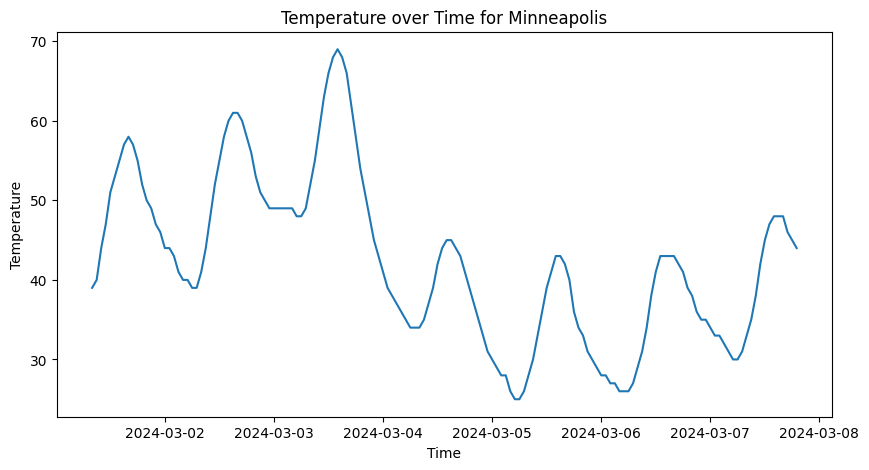


Getting Weather for Tokyo

No weather data for Tokyo

Getting Weather for Chicago

[{'detailedForecast': '',
  'dewpoint': {'unitCode': 'wmoUnit:degC', 'value': -6.666666666666667},
  'endTime': '2024-03-01T09:00:00-06:00',
  'icon': 'https://api.weather.gov/icons/land/day/sct,0?size=small',
  'isDaytime': True,
  'name': '',
  'number': 1,
  'probabilityOfPrecipitation': {'unitCode': 'wmoUnit:percent', 'value': 0},
  'relativeHumidity': {'unitCode': 'wmoUnit:percent', 'value': 50},
  'shortForecast': 'Mostly Sunny',
  'startTime': '2024-03-01T08:00:00-06:00',
  'temperature': 37,
  'temperatureTrend': None,
  'temperatureUnit': 'F',
  'windDirection': 'S',
  'windSpeed': '15 mph'},
 {'detailedForecast': '',
  'dewpoint': {'unitCode': 'wmoUnit:degC', 'value': -5.555555555555555},
  'endTime': '2024-03-01T10:00:00-06:00',
  'icon': 'https://api.weather.gov/icons/land/day/sct,0?size=small',
  'isDaytime': True,
  'name': '',
  'number': 2,
  'probabilityOfPrecipitation': {'unitCode': 'w

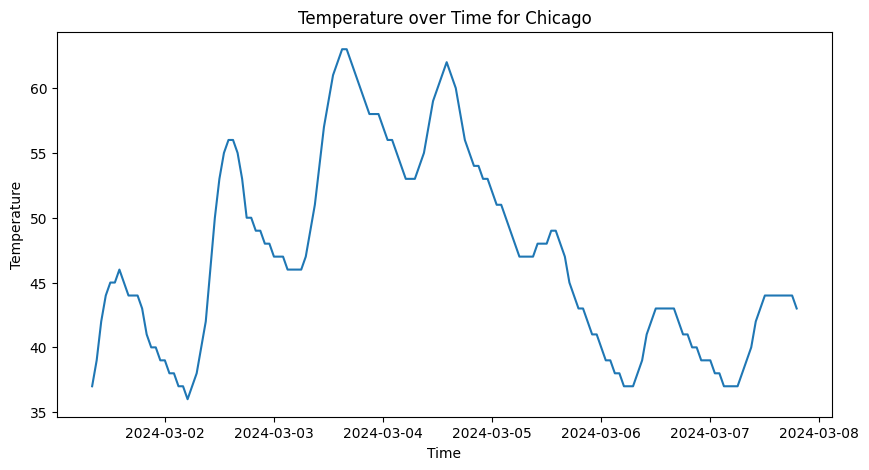

In [51]:
import pprint
import matplotlib.pyplot as plt
import pandas as pd

for name, location in places.items():
    lat = location[0]
    lon = location[1]
    url = f'https://api.weather.gov/points/{lat},{lon}'

    time_stamps = []
    temp_data = []

    try:
        print(f"Getting Weather for {name}\n")
        response = requests.get(url)
        if response.status_code == 200:
            json_data = json.loads(response.text)
            hourly = json_data["properties"]["forecastHourly"] # make sure nested keys properly
            hours_response = json.loads(requests.get(hourly).text)
            json_period_list = hours_response["properties"]["periods"]
            pprint.pprint(json_period_list)
            for period in json_period_list:
                time_stamps.append(period["startTime"])
                temp_data.append(period["temperature"])
        else:
            print(f"No weather data for {name}")
    except requests.exceptions.RequestException as e:
        # catastrophic error. bail.
        raise SystemExit(e)
    
    if len(temp_data) > 0:
        # chart data
        time_stamps = [pd.to_datetime(ts) for ts in time_stamps]

        # Create a plot
        plt.figure(figsize=(10,5))
        plt.plot(time_stamps, temp_data)

        # Add title and labels
        plt.title(f'Temperature over Time for {name}')
        plt.xlabel('Time')
        plt.ylabel('Temperature')

    # Show the plot
    plt.show()

    print()